# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [30]:
# Import all the libraries
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
pd.set_option('display.max_columns', None)
import glob
import datetime
import os
from io import StringIO
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
DATA_FOLDER = '../../ADA2017-Tutorials/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

---
We first import the data files. We do this separately for each country in order to be able to take into account the different formats and anomalies. In order to be able to load the Sierra Leone data more easily we first remove any lines that contain a percentage sign in order to help Pandas in parsing the data correctly as those don't contain any relevant data for our needs.

In [32]:
#List of paths to the data files
all_sl_files = glob.glob(DATA_FOLDER + r'/ebola/sl_data/*.csv')

frames = []

for f in all_sl_files:
    data = None
    
    # Remove any lines containing a percentage sign, then reassemble the remaining lines
    with open(f) as file:
        data = StringIO('\n'.join([l for l in file if '%' not in l]))

    # Load the cleaned data one file at at time
    new_frame = pd.read_csv(data,
                           parse_dates=['date'], thousands=',',
                           na_values=['Nr', '-', 'NR'])
    frames.append(new_frame)


sl = pd.concat(frames)
# We chose the following expressions to represent "new cases" and "deaths". Other expressions were 
# excluded as they did not contribute to our analysis. For example, "positive_confirmed" was excluded 
# from our analysis of new cases because it duplicated the information given by "new_confirmed".
sl_newcases = ['new_suspected', 'new_probable', 'new_confirmed']
sl_deaths = ['death_suspected', 'death_probable', 'death_confirmed']

In [65]:
sl.variable.unique()

array(['population', 'new_noncase', 'new_suspected', 'new_probable',
       'new_confirmed', 'cum_noncase', 'cum_suspected', 'cum_probable',
       'cum_confirmed', 'death_suspected', 'death_probable',
       'death_confirmed', 'cfr', 'etc_new_admission',
       'etc_currently_admitted', 'etc_cum_admission', 'etc_new_deaths',
       'etc_cum_deaths', 'etc_new_discharges', 'etc_cum_discharges',
       'cum_contacts', 'cum_completed_contacts', 'contacts_followed',
       'new_contacts', 'contacts_healthy', 'contacts_ill',
       'contacts_not_seen', 'new_completed_contacts', 'percent_seen',
       'total_lab_samples', 'repeat_samples', 'new_samples',
       'new_positive', 'new_negative', 'positive_corpse',
       'negative_corpse', 'pending'], dtype=object)

In [33]:
# Calculate the daily average per month and return a dataframe with the month used as an index
def compute_daily_averages(df, variable_column_name, variables_to_average, date_column_name):
    df_filtered = df[(df[variable_column_name].isin(variables_to_average))]
    di = pd.DatetimeIndex(df_filtered[date_column_name])
    g = df_filtered.groupby([di.month])
    ndays = g[date_column_name].nunique()
    
    avg_df = g.sum().div(ndays, axis='rows')
    avg_df.index.names = ['Month']
    
    return avg_df.dropna(axis=1, how='all')

In [34]:
# Calculate the daily average per month of new cases in Sierra Leone.
sl_avg_new_case = compute_daily_averages(sl, 'variable', sl_newcases, 'date')
sl_avg_new_case_sum = sl_avg_new_case.drop('National', axis = 1).sum(axis = 1)
sl_avg_new_case_SN = pd.concat([sl_avg_new_case['National'], sl_avg_new_case_sum], axis =1, keys=['National','Sum of Regions'])
#sl_avg_case_SN

In [35]:
# Calculate the daily average per month of deaths in Sierra Leone.
sl_avg_deaths = compute_daily_averages(sl, 'variable', sl_deaths, 'date')
sl_avg_deaths_sum = sl_avg_deaths.drop('National', axis = 1).sum(axis = 1)
sl_avg_deaths_SN = pd.concat([sl_avg_deaths['National'], sl_avg_deaths_sum], axis =1, keys=['National','Sum of Regions'])
#sl_avg_deaths_SN

In [36]:
# Load the liberia dataset
all_files = glob.glob(DATA_FOLDER + r'/ebola/liberia_data/*.csv')
frames = []

for f in all_files:
    new_frame = pd.read_csv(f)
    frames.append(new_frame)
    
lib = pd.concat(frames)
lib_deaths = ['Newly reported deaths']
lib_newcases = ['Newly reported contacts', 'New Case/s (Suspected)', 'New Case/s (Probable)', 'New case/s (confirmed)']

In [37]:
lib.Variable.unique()

array(['Specimens collected', 'Specimens pending for testing',
       'Total specimens tested', 'Newly reported deaths',
       'Total death/s in confirmed cases',
       'Total death/s in probable cases',
       'Total death/s in suspected cases',
       'Total death/s in confirmed, probable, suspected cases',
       'Case Fatality Rate (CFR) - Confirmed & Probable Cases',
       'Newly reported contacts', 'Total contacts listed',
       'Currently under follow-up', 'Contacts seen',
       'Contacts who completed 21 day follow-up',
       'Contacts lost to follow-up', 'New admissions',
       'Total no. currently in Treatment Units', 'Total discharges',
       'Cumulative admission/isolation', 'Newly Reported Cases in HCW',
       'Cumulative cases among HCW', 'Newly Reported deaths in HCW',
       'Cumulative deaths among HCW', 'New Case/s (Suspected)',
       'New Case/s (Probable)', 'New case/s (confirmed)',
       'Total suspected cases', 'Total probable cases',
       'Total conf

In [38]:
lib

,Bomi County,Bong County,Date,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County,Unnamed: 18,Variable
0,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Specimens collected
1,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Specimens pending for testing
2,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,7.0,28.0,NaN,NaN,NaN,NaN,NaN,Total specimens tested
3,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,Newly reported deaths
4,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0,8.0,NaN,NaN,NaN,NaN,NaN,Total death/s in confirmed cases
5,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,6.0,NaN,NaN,NaN,NaN,NaN,Total death/s in probable cases
6,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,Total death/s in suspected cases
7,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,0.0,16.0,NaN,NaN,NaN,NaN,NaN,"Total death/s in confirmed, probable, suspecte..."
8,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case Fatality Rate (CFR) - Confirmed & Probabl...
9,NaN,NaN,6/16/2014,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,0.0,41.0,NaN,NaN,NaN,NaN,NaN,Newly reported contacts


In [39]:
# Calculate the daily average per month of new cases in Liberia.
lib_avg_new_case = compute_daily_averages(lib, 'Variable', lib_newcases, 'Date')
lib_avg_new_case_sum = lib_avg_new_case.drop('National', axis = 1).sum(axis = 1)
lib_avg_new_case_SN = pd.concat([lib_avg_new_case['National'], lib_avg_new_case_sum], axis =1, keys=['National','Sum of Regions'])
lib_avg_new_case_SN

,National,Sum of Regions
Month,,
6,32.857143,32.857143
7,29.545455,29.545455
8,166.444444,166.444444
9,310.125000,310.125000
10,251.200000,251.760000
11,166.000000,176.933333
12,5226.555556,5132.555556


In [40]:
# Calculate the daily average per month of deaths in Liberia.
lib_avg_deaths = compute_daily_averages(lib, 'Variable', lib_deaths, 'Date')
lib_avg_deaths_sum = lib_avg_deaths.drop('National', axis = 1).sum(axis = 1)
lib_avg_deaths_SN = pd.concat([lib_avg_deaths['National'], lib_avg_deaths_sum], axis =1, keys=['National','Sum of Regions'])
lib_avg_deaths_SN

,National,Sum of Regions
Month,,
6,2.000000,1.857143
7,4.272727,4.272727
8,23.222222,23.222222
9,36.041667,36.041667
10,28.040000,28.120000
11,13.466667,13.666667
12,NaN,NaN


In [41]:
# Load the Guinea dataset
all_files = glob.glob(DATA_FOLDER + r'/ebola/guinea_data/*.csv')
frames = []

for f in all_files:
    new_frame = pd.read_csv(f)
    frames.append(new_frame)
    
guinea = pd.concat(frames)
print(guinea.Description.unique())
#not sure whether to include "New deaths registered among health workers"
guinea_deaths = ['New deaths registered', 'New deaths registered today']
                 #, 'New deaths registered today (confirmed)', 'New deaths registered today (probables)', 'New deaths registered today (suspects)']
#not sure whether to include "New cases of confirmed among health workers"
guinea_newcases = ['New cases of suspects', 'New cases of probables', 'New cases of confirmed']

['New cases of suspects' 'New cases of probables' 'New cases of confirmed'
 'Total new cases registered so far' 'Total cases of suspects'
 'Total cases of probables' 'Total cases of confirmed'
 'Cumulative (confirmed + probable + suspects)'
 'New deaths registered today' 'New deaths registered today (confirmed)'
 'New deaths registered today (probables)'
 'New deaths registered today (suspects)' 'Total deaths of suspects'
 'Total deaths of probables' 'Total deaths of confirmed'
 'Total deaths (confirmed + probables + suspects)' 'Total PEC center today'
 'Total PEC center today (confirmed)' 'Total PEC center today (probables)'
 'Total PEC center today (suspects)'
 'Total of deaths in confirmed cases in CTE'
 'Total of cured in confirmed cases in CTE'
 'Number of male confirmed cases' 'Number of female confirmed cases'
 'Number of male probables cases' 'Number of female probables cases'
 'Number of male suspects cases' 'Number of female suspects cases'
 'Total number of male cases' 'Tota

In [42]:
guinea

,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Date,Description,Dinguiraye,Dubreka,Forecariah,Gueckedou,Kerouane,Kindia,Kissidougou,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
0,NaN,0,5,NaN,0,NaN,2014-08-04,New cases of suspects,0,0,NaN,0,NaN,NaN,0,0,NaN,0,NaN,0,0,0,0,5,NaN
1,NaN,0,0,NaN,0,NaN,2014-08-04,New cases of probables,0,0,NaN,0,NaN,NaN,0,0,NaN,0,NaN,0,0,0,0,0,NaN
2,NaN,0,1,NaN,0,NaN,2014-08-04,New cases of confirmed,0,0,NaN,3,NaN,NaN,0,0,NaN,0,NaN,0,0,0,0,4,NaN
3,NaN,0,6,NaN,0,NaN,2014-08-04,Total new cases registered so far,0,0,NaN,3,NaN,NaN,0,0,NaN,0,NaN,0,0,0,0,9,NaN
4,NaN,0,9,NaN,0,NaN,2014-08-04,Total cases of suspects,0,0,NaN,2,NaN,NaN,0,0,NaN,0,NaN,0,0,0,0,11,NaN
5,NaN,5,8,NaN,3,NaN,2014-08-04,Total cases of probables,1,0,NaN,95,NaN,NaN,4,2,NaN,11,NaN,0,1,0,3,133,NaN
6,NaN,18,78,NaN,1,NaN,2014-08-04,Total cases of confirmed,0,0,NaN,188,NaN,NaN,2,2,NaN,28,NaN,4,1,6,23,351,NaN
7,NaN,23,95,NaN,4,NaN,2014-08-04,Cumulative (confirmed + probable + suspects),1,0,NaN,285,NaN,NaN,6,4,NaN,39,NaN,4,2,6,26,495,NaN
8,NaN,0,0,NaN,0,NaN,2014-08-04,New deaths registered today,0,0,NaN,2,NaN,NaN,0,0,NaN,0,NaN,0,0,0,0,2,NaN
9,NaN,0,0,NaN,0,NaN,2014-08-04,New deaths registered today (confirmed),0,0,NaN,2,NaN,NaN,0,0,NaN,0,NaN,0,0,0,0,2,NaN


In [43]:
g2 =guinea[guinea.Description.isin(guinea_newcases + guinea_deaths)]

In [44]:
# Convert the values from type object to float
for c in guinea.columns.difference(['Date', 'Description']):
    g2[c] = g2[c].astype(float)

In [45]:
# Calculate the daily average per month of new cases in Guinea.
guinea_avg_new_case = compute_daily_averages(g2, 'Description', guinea_newcases, 'Date')
guinea_avg_new_case_sum = guinea_avg_new_case.drop('Totals', axis = 1).sum(axis = 1)
guinea_avg_new_case_SN = pd.concat([guinea_avg_new_case['Totals'], guinea_avg_new_case_sum], axis =1, keys=['National','Sum of Regions'])
guinea_avg_new_case_SN

,National,Sum of Regions
Month,,
8,25.800,25.8000
9,19.625,19.3125
10,34.000,34.0000


In [46]:
# Calculate the daily average per month of deaths in Guinea.
guinea_avg_deaths = compute_daily_averages(g2, 'Description', guinea_deaths, 'Date')
guinea_avg_deaths_sum = guinea_avg_deaths.drop('Totals', axis = 1).sum(axis = 1)
guinea_avg_deaths_SN = pd.concat([guinea_avg_deaths['Totals'], guinea_avg_deaths_sum], axis =1, keys=['National','Sum of Regions'])
guinea_avg_deaths_SN

,National,Sum of Regions
Month,,
8,3.4000,3.2000
9,3.5625,3.5625
10,15.0000,15.0000


In [47]:
# Concatenate the country dataframes
sl_avg = pd.concat([sl_avg_new_case_SN,sl_avg_deaths_SN], axis=1, keys=['New Cases','Deaths'])
lib_avg = pd.concat([lib_avg_new_case_SN,lib_avg_deaths_SN], axis=1, keys=['New Cases','Deaths'])
guinea_avg = pd.concat([guinea_avg_new_case_SN,guinea_avg_deaths_SN], axis=1, keys=['New Cases','Deaths'])
results = pd.concat([sl_avg,lib_avg,guinea_avg], axis=1, keys=['Sierra Leone','Liberia','Guinea']).transpose()
results

Month                                         6          7           8   \
Sierra Leone New Cases National              NaN        NaN   25.150000   
                       Sum of Regions        NaN        NaN   26.650000   
             Deaths    National              NaN        NaN  331.950000   
                       Sum of Regions        NaN        NaN  374.050000   
Liberia      New Cases National        32.857143  29.545455  166.444444   
                       Sum of Regions  32.857143  29.545455  166.444444   
             Deaths    National         2.000000   4.272727   23.222222   
                       Sum of Regions   1.857143   4.272727   23.222222   
Guinea       New Cases National              NaN        NaN   25.800000   
                       Sum of Regions        NaN        NaN   25.800000   
             Deaths    National              NaN        NaN    3.400000   
                       Sum of Regions        NaN        NaN    3.200000   

Month                                          9            10           11  \
Sierra Leone New Cases National         40.689655    70.928571    75.238095   
                       Sum of Regions   42.827586    71.928571    78.571429   
             Deaths    National        488.000000  1162.357143  1453.476190   
                       Sum of Regions  500.758621  1168.142857  1149.857143   
Liberia      New Cases National        310.125000   251.200000   166.000000   
                       Sum of Regions  310.125000   251.760000   176.933333   
             Deaths    National         36.041667    28.040000    13.466667   
                       Sum of Regions   36.041667    28.120000    13.666667   
Guinea       New Cases National         19.625000    34.000000          NaN   
                       Sum of Regions   19.312500    34.000000          NaN   
             Deaths    National          3.562500    15.000000          NaN   
                       Sum of Regions    3.562500    15.000000          NaN   

Month                                           12  
Sierra Leone New Cases National          41.000000  
                       Sum of Regions    41.000000  
             Deaths    National        1607.600000  
                       Sum of Regions  1607.600000  
Liberia      New Cases National        5226.555556  
                       Sum of Regions  5132.555556  
             Deaths    National                NaN  
                       Sum of Regions          NaN  
Guinea       New Cases National                NaN  
                       Sum of Regions          NaN  
             Deaths    National                NaN  
                       Sum of Regions          NaN

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

---
We first generate a list containing the paths of all data files

In [48]:
data_folder = DATA_FOLDER + '/microbiome'
data_files = glob.glob(data_folder + r'/MID*.xls')
metadata_file = data_folder + '/metadata.xls'

Then we load all the spreadsheets containing the data in separate dataframes. We also add a 'BARCODE' column that is set to the name of the spreadsheet that the data was loaded from to each frame. This will be used as a join key to add the metadata to the dataframe. We then concatenate the dataframes containing data together.

In [49]:
data_frames = []
for f in data_files:
    # Load the data from the spreadsheets. Since they have no header we have to specify
    # the column names manually.
    df = pd.read_excel(f, sheetname='Sheet 1', header=None, names=['Taxon', 'Count'])
    
    # The name of the spreadsheet that the data was loaded from, without extension
    # e.g. 'MID1'.
    name = os.path.splitext(os.path.basename(f))[0]
    
    # This name gets added to the newly created dataframe as a new column. This way all rows
    # that were loaded from the same spreadsheet will have the same value in the 'BARCODE' column
    df['BARCODE'] = name
    data_frames.append(df)
    
data = pd.concat(data_frames)

# Read the metadata, headers are in the spreadsheet this time
metadata = pd.read_excel(metadata_file, sheetname='Sheet1')

We are then merging the dataframes with an inner join. There is no risk of losing data as the metadata file has
a row for each of the data files.
We also replace all occurrences of NaN with 'unknown' with fillna() and set an index for the resulting
dataframe. The combination of group and tissue is not an unique index since the same taxon may appear in different data files. However the combination of taxon, group, and sample is an unique index for this dataframe.

In [50]:
bacteria_df = pd.merge(data, metadata).fillna('unknown').set_index(['Taxon', 'GROUP', 'SAMPLE'])[['Count']]
bacteria_df

,,,Count
Taxon,GROUP,SAMPLE,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",EXTRACTION CONTROL,unknown,7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",EXTRACTION CONTROL,unknown,2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",EXTRACTION CONTROL,unknown,3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",EXTRACTION CONTROL,unknown,3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",EXTRACTION CONTROL,unknown,7
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methanosarcinaceae Methanimicrococcus",EXTRACTION CONTROL,unknown,1
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methermicoccaceae Methermicoccus",EXTRACTION CONTROL,unknown,1
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Ferroglobus",EXTRACTION CONTROL,unknown,1
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Geoglobus",EXTRACTION CONTROL,unknown,1


In [51]:
# Verify that the index is indeed unique
bacteria_df.index.is_unique

True

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [52]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

#### 1. Description of attributes
Attribute | Type | Range
--- | --- | ---
pclass | category | 1, 2, 3
survived | boolean | True (1), False(0)
name | string | _Last name_, Mr./Mrs./Master./Miss. _First names_ (_Maiden name_)
sex | category | female, male
age | float | 0.167 - 80, NaN
sibsp | integer | 0 - 8
parch | integer | 0 - 9
ticket | string | LINE or _Ticket number_ (integer), often together with a non-integer code
fare | float | 0 - 512.33, NaN
cabin | string | NaN, or (A, B, C, D, E, F, G, T), sometimes with _Cabin name or number_, sometimes multiple
embarked | category | C(Cherbourg), Q (Queenstown), S(Southampton), NaN
boat | category | A-D, 1-16, NaN
body | float | 1 - 328, NaN
home.dest | string | Home city and/or state and/or Destination city and/or state, NaN

Travel class, sex, port of embarkation, and boat are categorical attributes as they can only assume a small set of values. Survival could also be treated as a categorical attribute but we chose to represent it as a boolean instead. Age is treated as a float instead of an integer type because it can be non-integer for some of the younger passengers and in order to allow it to be NaN when data is missing.

float was used for the body column instead of an integer type in order to allow this attribute to be NaN when data is missing.

Some entries list more than one boat for each passenger, probably due to uncertainty. We chose to only consider the first boat that appears in each entry.

In [53]:
# Load data from the Excel spreadsheet (sheet 'titanic'), set data type of 'survived' to boolean.
df = pd.read_excel(DATA_FOLDER+'/titanic.xls', sheetname='titanic', dtype={'survived': 'bool'})

# Only the first boat in each row is used, replace NaN with 'unknown'. Pandas treats the name of some of the
# boats as integers, so we need to convert all of them to strings in order to be able to apply the same
# function to all rows
df['boat'] = df.boat.fillna('unknown').apply(lambda b: str(b).split(' ')[-1])

# Treat these attributes as categorical
for c in ['pclass', 'sex', 'embarked', 'boat']:
    df[c] = df[c].astype('category')

#### 2. Histograms for the travel class, embarkation port, sex and age

(array([  86.,  162.,  361.,  210.,  132.,   62.,   27.,    6.]),
 array([  0.1667   ,  10.1458625,  20.125025 ,  30.1041875,  40.08335  ,
         50.0625125,  60.041675 ,  70.0208375,  80.       ]),
 <a list of 8 Patch objects>)

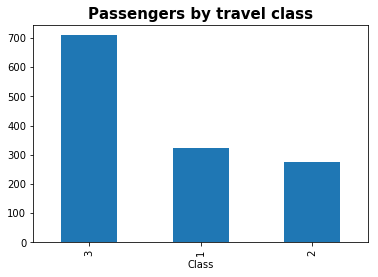

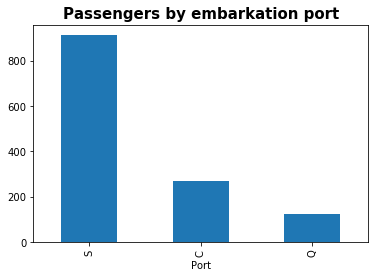

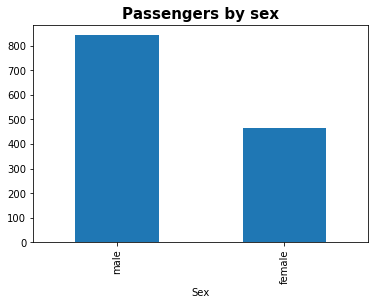

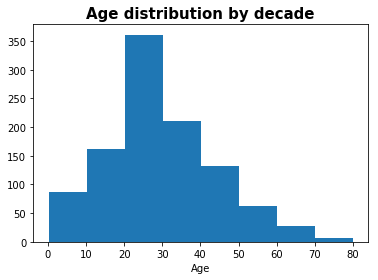

In [54]:
fig, ax = plt.subplots()
ax.set_title('Passengers by travel class', fontsize=15, fontweight='bold')
ax.set_xlabel('Class')
df.pclass.value_counts().plot(kind='bar', ax=ax)

# Embarkation port is only missing for two passengers, we chose to remove those
fig, ax = plt.subplots()
ax.set_title('Passengers by embarkation port', fontsize=15, fontweight='bold')
ax.set_xlabel('Port')
df.embarked.dropna().value_counts().plot(kind='bar', ax=ax)

fig, ax = plt.subplots()
ax.set_title('Passengers by sex', fontsize=15, fontweight='bold')
ax.set_xlabel('Sex')
df.sex.value_counts().plot(kind='bar', ax=ax)

fig, ax = plt.subplots()
ax.set_title('Age distribution by decade', fontsize=15, fontweight='bold')
ax.set_xlabel('Age')
# The difference between maximum and minimum age is roughly 80 years, so if we use 8 bins each of them
# will be 10 years wide. Rows where the age is missing cannot be taken into account.
ax.hist(df.age.dropna(), bins=8)

#### 3. Passenger distribution by cabin floor

The cabin floor is the first letter of the cabin's name. If the cabin names has two letters (e.g. F G63)
the first indicates the floor. The T cabin is on the boat deck so it should be counted as a separate floor.
Some passengers (tipically couples or families) are listed as having booked multiple cabins but always on the
same floor, so our approach of using the first character still works. Since cabin data is nearly always missing for second and third class passengers, the distribution is probably skewed towards the higher decks. This is consistent with the fact that deck C, which housed most of the first class cabins, has the highest proportion of passengers in our data.

([<matplotlib.patches.Wedge at 0x11995bf98>,
  <matplotlib.text.Text at 0x1199a6a20>])

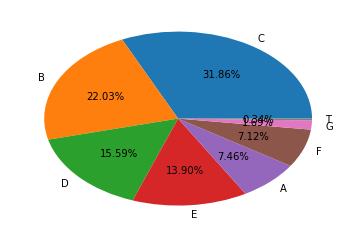

In [55]:
# The cabin floor is the first letter of the cabin's name. If the cabin names has two letters (e.g. F G63)
# the first indicates the floor. The T cabin is on the boat deck so it should be counted as a separate floor.
floor = df.cabin.dropna().apply(lambda c: c[0])
pie_data = floor.value_counts()
plt.pie(pie_data, labels=pie_data.index.values, autopct='%.2f%%')

#### 4. Survival rate by travel class

In [56]:
# Count how many rows satisfy the condition survived == True among those that also satisfy pclass == val,
# then display the result in a pie chart
def class_pie_chart(df, val):
    pie_class = df[df.pclass == val]['survived'].value_counts()
    plt.pie(pie_class, labels = pie_class.index.values, autopct='%.2f%%')

#### 4.1. Survival rate of first class passengers

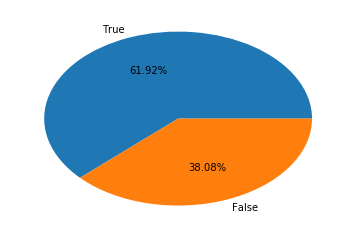

In [57]:
class_pie_chart(df, 1)

#### 4.2. Survival rate of second class passengers

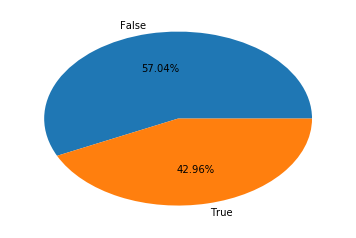

In [58]:
class_pie_chart(df, 2)

#### 4.3. Survival rate of third class passengers

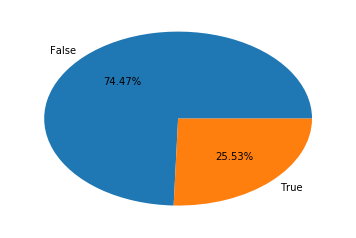

In [59]:
class_pie_chart(df, 3)

#### 5. Survival rate by travel class and sex

Python coerces boolean values to integers, using 0 for False and 1 for True. Therefore the survival rate
of a group of passengers can be expressed as the mean of the 'survived' value.

In [60]:
# Group rows by travel class and sex
class_sex_grouped = df[['survived']].groupby([df.pclass, df.sex])

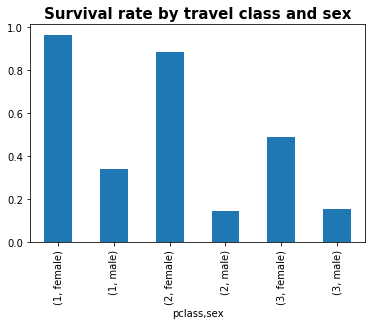

In [61]:
fig, ax = plt.subplots()
ax.set_title('Survival rate by travel class and sex', fontsize=15, fontweight='bold')
class_sex_grouped.mean().survived.plot(kind='bar', ax=ax)

#### 6. Survival rate by age category, travel class and sex

This is similar to the previous point: the survival rate of a group can again be expressed as the mean of the 'survived' column of its members due to how Python treats boolean values.
First the subset of the dataframe that is relevant to this point is copied with the rows in which the passenger's age is missing removed. We think that this is acceptable as the age of most passengers is recorded but it could nevertheless introduce a bias since age is more likely to be unknown for third class passengers than first or second class. The old index column is removed from the new dataframe to allow us to introduce new columns more easily

In [62]:
agedf = df[['age', 'pclass', 'sex', 'survived']].sort_values('age').dropna().copy().reset_index(drop=True)

Next we insert a new categorical column, having value 'Young' for passengers whose age is less or equal than the median, and 'Old' for all others. Creating two equally populated age categories is not possible without both groups having members aged 28.

In [63]:
agedf['age_category'] = agedf.age.apply(lambda x: 'Young' if x <= agedf.age.median() else 'Old').astype('category')
age_grouped = agedf[['pclass', 'sex', 'survived']].groupby([agedf.age_category, agedf.pclass, agedf.sex])
age_grouped.mean()

survived
age_category pclass sex             
Old          1      female  0.967391
                    male    0.302521
             2      female  0.872340
                    male    0.083333
             3      female  0.372093
                    male    0.144000
Young        1      female  0.951220
                    male    0.531250
             2      female  0.910714
                    male    0.216216
             3      female  0.513761
                    male    0.183036

In [64]:
age_grouped.mean().index.is_unique

True